## <b> <span style='color:#e61227'>|</span> AI FOR DEPT OF LANDS  WORKSHOP | Image Classification with Deep Learning </b>

- AI FOR DEPT OF LANDS WORKSHOP 2024
- Lecturer: Kao

![](https://github.com/kaopanboonyuen/ai_for_dept_of_lands/raw/main/img/lands_logo.png)

Reference: Kaggle Code

# **Build Your Own Image Classification in TensorFlow**

This assignment will help you guys understand the fundamentals of image classification, TensorFlow, and neural network architectures.

- Credit: https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2023s1
- Author: Kao Panboonyuen


![](https://github.com/kaopanboonyuen/ai_for_dept_of_lands/raw/main/img/lands_logo_v3.png)

## **Install TensorFlow with pip**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
#!pip install tensorflow==2.9.1 # CPU Version
#!pip install tensorflow-gpu==2.9.1 # GPU Version

## **Download Sample Dataset**

In [ ]:
!wget https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2023s1/raw/main/dataset/MangoLeafBD_dataset_small_v2.zip

--2024-06-02 03:34:38--  https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2023s1/raw/main/dataset/MangoLeafBD_dataset_small_v2.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2023s1/main/dataset/MangoLeafBD_dataset_small_v2.zip [following]
--2024-06-02 03:34:39--  https://raw.githubusercontent.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2023s1/main/dataset/MangoLeafBD_dataset_small_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26064752 (25M) [application/zip]
Saving to: ‘MangoLeafBD_dataset_small_v2.zip’

MangoLe

### **Don't forget to uncomment** this line before training the model to unzip the dataset, which is currently in a zip file format.

In [ ]:
!unzip MangoLeafBD_dataset_small_v2.zip

Archive:  MangoLeafBD_dataset_small_v2.zip
   creating: MangoLeafBD_dataset_small_v2/
  inflating: __MACOSX/._MangoLeafBD_dataset_small_v2  
   creating: MangoLeafBD_dataset_small_v2/Bacterial Canker/
  inflating: __MACOSX/MangoLeafBD_dataset_small_v2/._Bacterial Canker  
   creating: MangoLeafBD_dataset_small_v2/Anthracnose/
  inflating: __MACOSX/MangoLeafBD_dataset_small_v2/._Anthracnose  
  inflating: MangoLeafBD_dataset_small_v2/.DS_Store  
  inflating: __MACOSX/MangoLeafBD_dataset_small_v2/._.DS_Store  
   creating: MangoLeafBD_dataset_small_v2/Healthy/
  inflating: __MACOSX/MangoLeafBD_dataset_small_v2/._Healthy  
   creating: MangoLeafBD_dataset_small_v2/Die Back/
  inflating: __MACOSX/MangoLeafBD_dataset_small_v2/._Die Back  
   creating: MangoLeafBD_dataset_small_v2/Sooty Mould/
  inflating: __MACOSX/MangoLeafBD_dataset_small_v2/._Sooty Mould  
   creating: MangoLeafBD_dataset_small_v2/Gall Midge/
  inflating: __MACOSX/MangoLeafBD_dataset_small_v2/._Gall Midge  
  inflating: M

# **Import Python Libraries (Deep Learning)**

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# **Data Preprocessing**

### **Read data and store it in dataframe**

In [ ]:
def remove_ds_store(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename == '.DS_Store':
                file_path = os.path.join(dirpath, filename)
                os.remove(file_path)
                print(f"Removed: {file_path}")

### **Roor Directory of Dataset**

In [ ]:
# Specify the root directory containing subfolders
root_directory = '/content/MangoLeafBD_dataset_small_v2/'

# Call the function to remove .DS_Store files
remove_ds_store(root_directory)

Removed: /content/MangoLeafBD_dataset_small_v2/.DS_Store
Removed: /content/MangoLeafBD_dataset_small_v2/Sooty Mould/.DS_Store
Removed: /content/MangoLeafBD_dataset_small_v2/Die Back/.DS_Store
Removed: /content/MangoLeafBD_dataset_small_v2/Healthy/.DS_Store
Removed: /content/MangoLeafBD_dataset_small_v2/Anthracnose/.DS_Store
Removed: /content/MangoLeafBD_dataset_small_v2/Gall Midge/.DS_Store
Removed: /content/MangoLeafBD_dataset_small_v2/Bacterial Canker/.DS_Store


In [ ]:
# Generate data paths with labels
filepaths = []
labels = []

folds = os.listdir(root_directory)
for fold in folds:
    foldpath = os.path.join(root_directory, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
df

,filepaths,labels
0,/content/MangoLeafBD_dataset_small_v2/Sooty Mo...,Sooty Mould
1,/content/MangoLeafBD_dataset_small_v2/Sooty Mo...,Sooty Mould
2,/content/MangoLeafBD_dataset_small_v2/Sooty Mo...,Sooty Mould
3,/content/MangoLeafBD_dataset_small_v2/Sooty Mo...,Sooty Mould
4,/content/MangoLeafBD_dataset_small_v2/Sooty Mo...,Sooty Mould
...,...,...
936,/content/MangoLeafBD_dataset_small_v2/Bacteria...,Bacterial Canker
937,/content/MangoLeafBD_dataset_small_v2/Bacteria...,Bacterial Canker
938,/content/MangoLeafBD_dataset_small_v2/Bacteria...,Bacterial Canker
939,/content/MangoLeafBD_dataset_small_v2/Bacteria...,Bacterial Canker


### **Split dataframe into train, valid, and test**

In [ ]:
# Split df into train_df and temp_df (60% train, 40% temp)
train_df, temp_df = train_test_split(df, train_size=0.6, shuffle=True, random_state=123)

# Split temp_df into valid_df and test_df (50% valid, 50% test)
valid_df, test_df = train_test_split(temp_df, train_size=0.5, shuffle=True, random_state=123)

### **Create image data generator**

In [ ]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 564 validated image filenames belonging to 6 classes.
Found 188 validated image filenames belonging to 6 classes.
Found 189 validated image filenames belonging to 6 classes.


### **Show sample from train data**

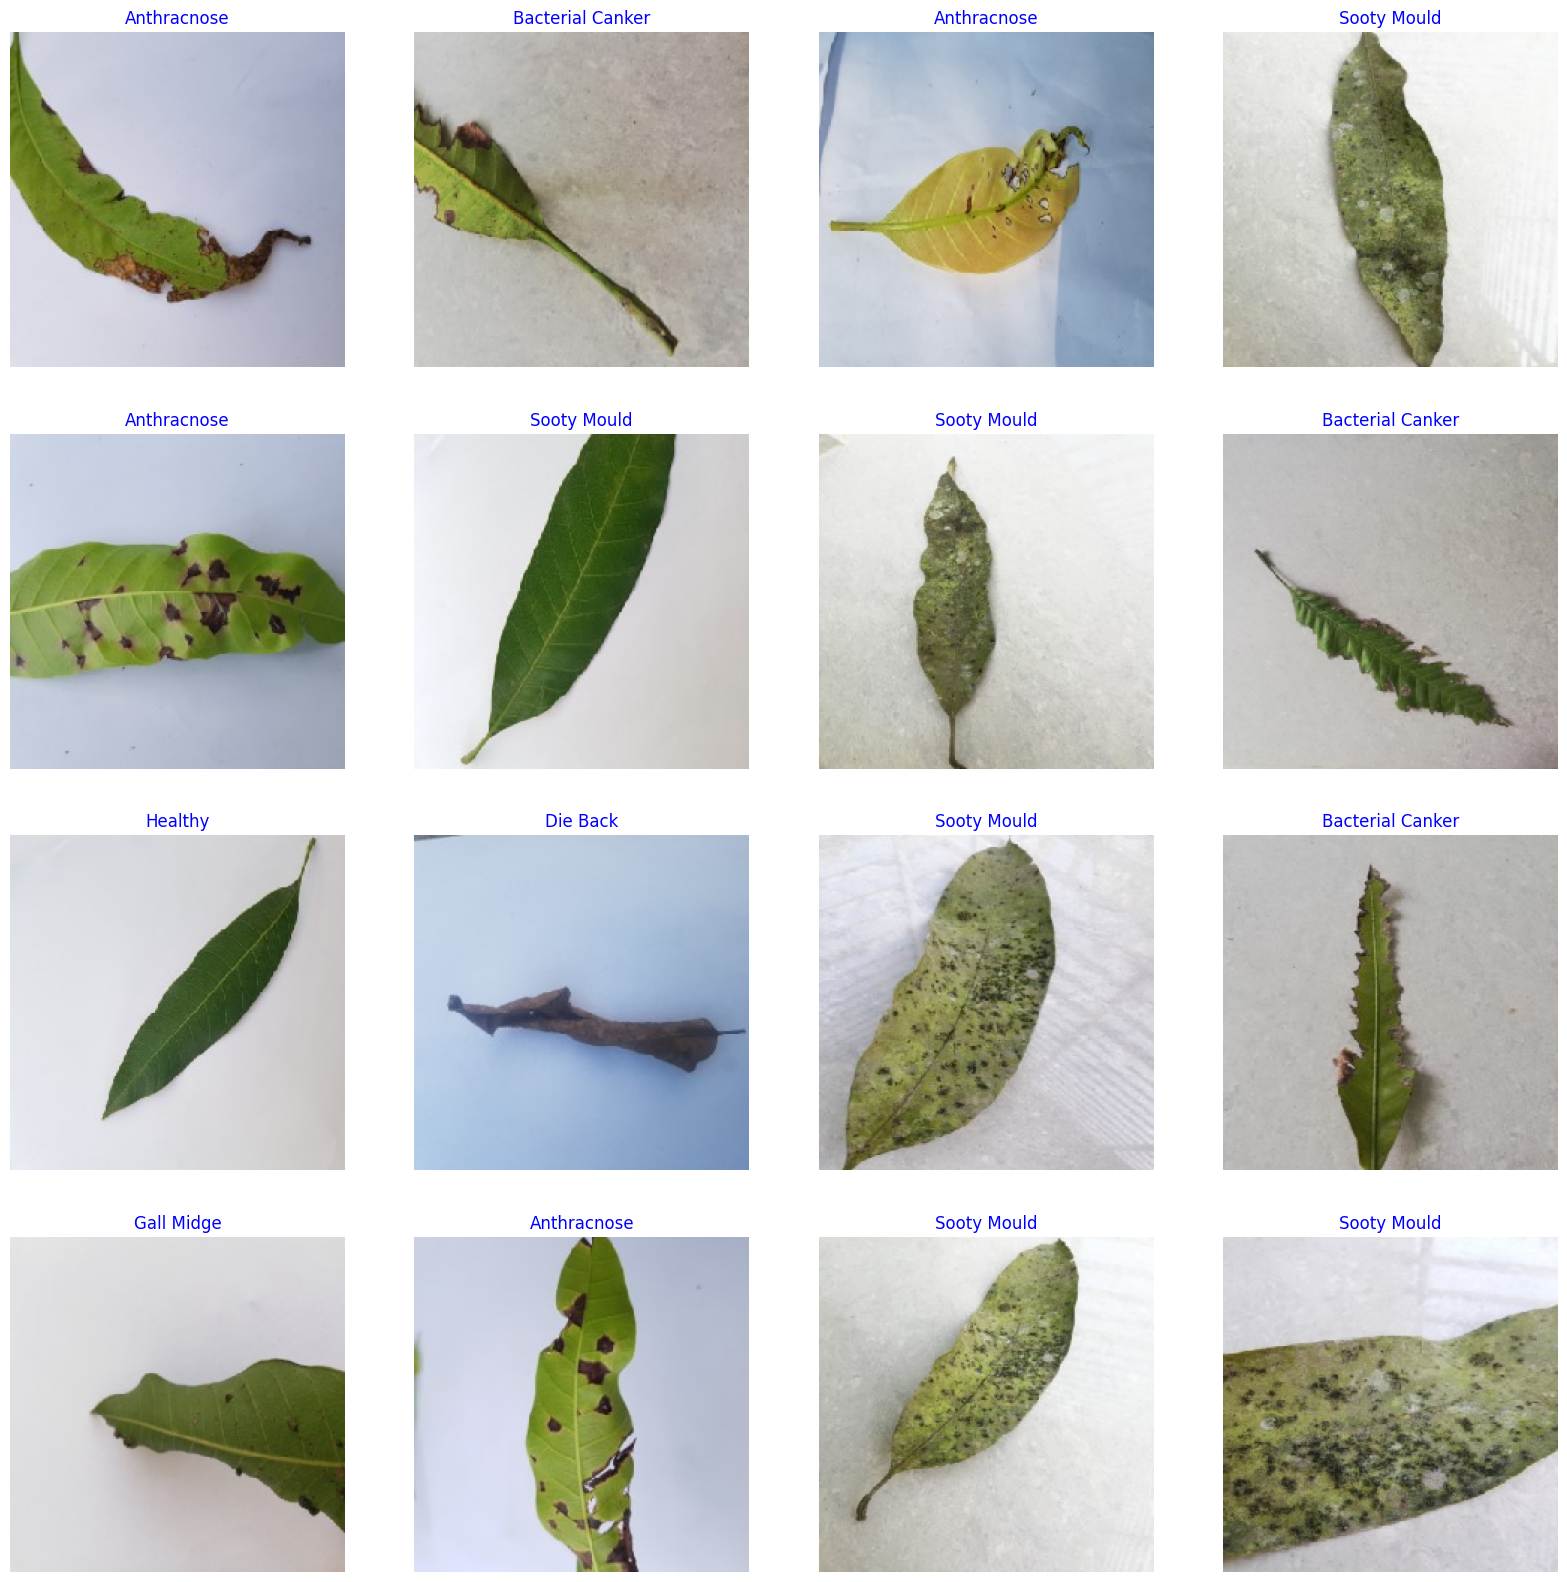

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# **Model Structure**

#### **Generic Model Creation**

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                         

#### **Train model**

In [ ]:
batch_size = 16   # set batch size for training
epochs = 5   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/5
36/36 [==============================] - 50s 323ms/step - loss: 8.0715 - accuracy: 0.8014 - val_loss: 8.9329 - val_accuracy: 0.7979
Epoch 2/5
36/36 [==============================] - 5s 143ms/step - loss: 7.0509 - accuracy: 0.9557 - val_loss: 7.5459 - val_accuracy: 0.9202
Epoch 3/5
36/36 [==============================] - 6s 154ms/step - loss: 6.5045 - accuracy: 0.9663 - val_loss: 6.8075 - val_accuracy: 0.9362
Epoch 4/5
36/36 [==============================] - 5s 143ms/step - loss: 6.0037 - accuracy: 0.9805 - val_loss: 6.1736 - val_accuracy: 0.9574
Epoch 5/5
36/36 [==============================] - 7s 184ms/step - loss: 5.5841 - accuracy: 0.9805 - val_loss: 5.6452 - val_accuracy: 0.9681


#### **Display model performance**

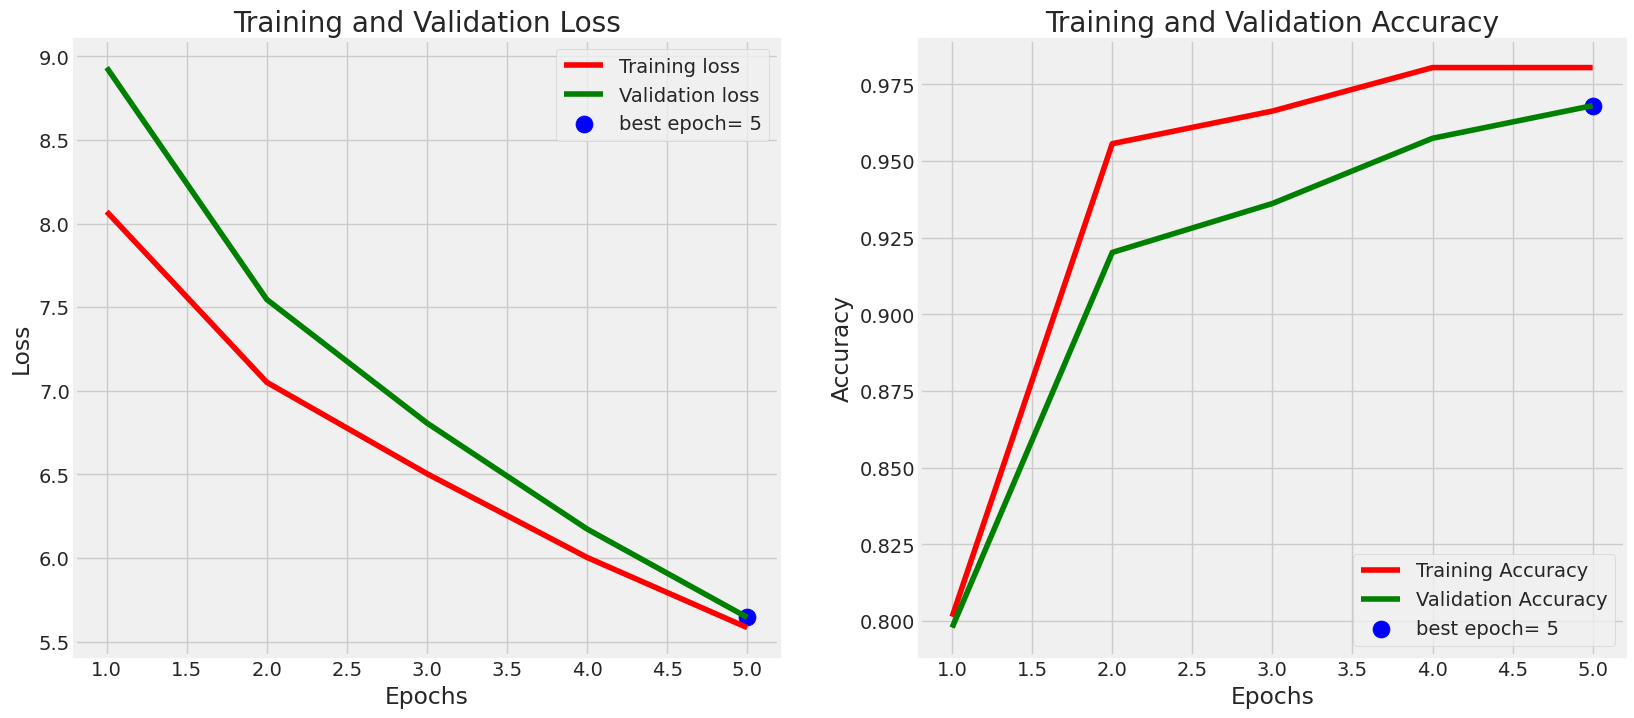

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# **Evaluate model**

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

3/3 [==============================] - 2s 119ms/step - loss: 5.7897 - accuracy: 0.9524
Train Loss:  5.442498683929443
Train Accuracy:  1.0
--------------------
Validation Loss:  5.486860752105713
Validation Accuracy:  1.0
--------------------
Test Loss:  5.7897233963012695
Test Accuracy:  0.9523809552192688


# **Get Predictions**

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

#### **Confusion Matrics and Classification Report**

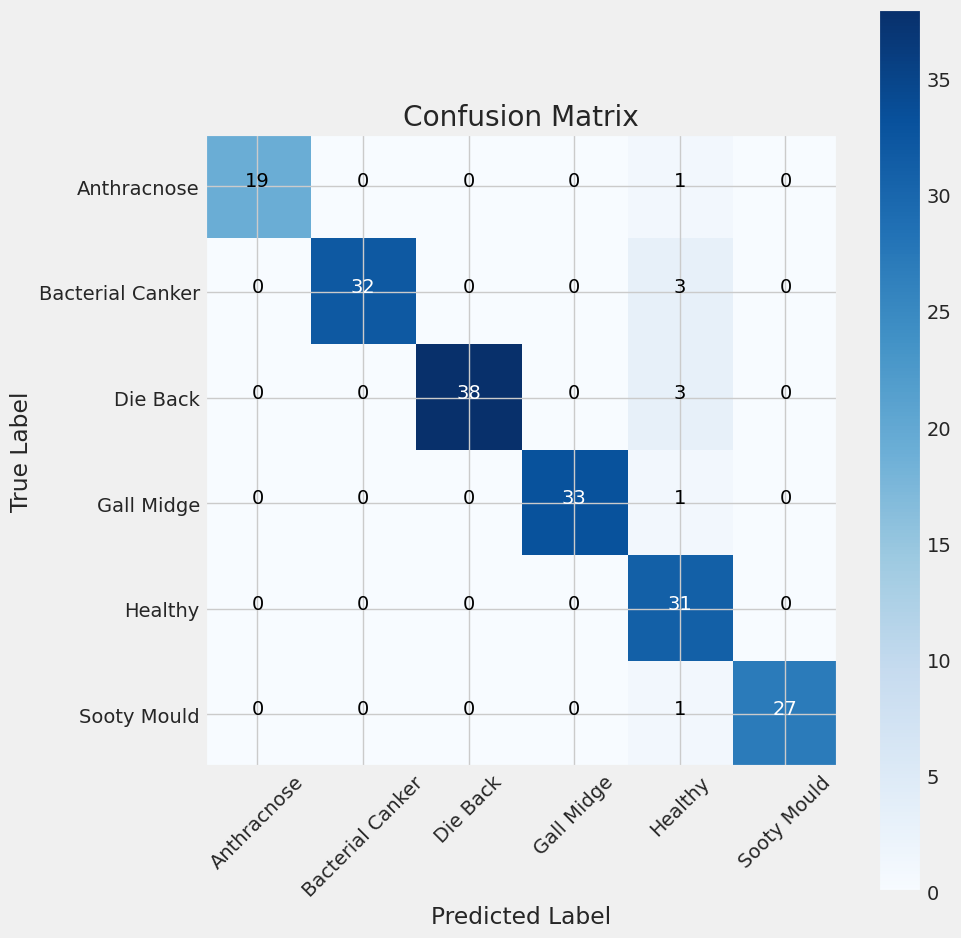

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

     Anthracnose       1.00      0.95      0.97        20
Bacterial Canker       1.00      0.91      0.96        35
        Die Back       1.00      0.93      0.96        41
      Gall Midge       1.00      0.97      0.99        34
         Healthy       0.78      1.00      0.87        31
     Sooty Mould       1.00      0.96      0.98        28

        accuracy                           0.95       189
       macro avg       0.96      0.95      0.96       189
    weighted avg       0.96      0.95      0.95       189



#### **Save model**

In [ ]:
model_name = model.input_names[0][:-6]
subject = 'Mango Diseases'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

model was saved as efficientnetb0-Mango Diseases-95.24.h5
weights were saved as efficientnetb0-Mango Diseases-weights.h5


#### **Generate CSV files containing classes indicies & image size**

In [ ]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')

class csv file was saved as Mango Diseases-class_dict.csv
